In [ ]:
# mnist进行手写识别

In [7]:
import tensorflow as tf
from sklearn.datasets import load_iris
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import Model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES'] = '1' # 使用 GPU 1
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0],True)
logical_devices = tf.config.list_logical_devices("GPU")

In [2]:
# 加载数据
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print('x_train_shape: ', x_train.shape)
print('y_train_shape: ', y_train.shape)
print('x_test_shape: ', x_test.shape)
print('y_test_shape: ', y_test.shape)

x_train_shape:  (60000, 28, 28)
y_train_shape:  (60000,)
x_test_shape:  (10000, 28, 28)
y_test_shape:  (10000,)


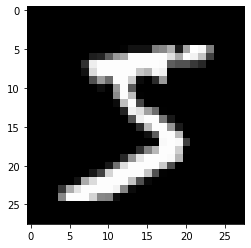

label:  5


In [11]:
plt.imshow(x_train[0],cmap='gray')
plt.show()
print('label: ', y_train[0])
# 可视化图像

In [12]:
model = keras.models.Sequential()
model.add(keras.Input(shape = (28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

# 使用class形式进行构建

# class MnistModel(Model):
#     def __init__(self):
#         super(MnistModel, self).__init__()
#         self.flatten = keras.layers.Flatten()
#         self.d1 = keras.layers.Dense(units=128, activation='relu')
#         self.d2 = keras.layers.Dense(units=10, activation='softmax')
#
#     def call(self, x):
#         x = self.flatten(x)
#         x = self.d1(x)
#         y = self.d2(y)
#         return y
# model = MnistModel()

In [13]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), # 由于是softmax概率和int label的loss 所以使用SparseCategoricalCrossentropy
    metrics=['sparse_categorical_accuracy']
)

In [14]:
# fit部分
model.fit(x_train,y_train,batch_size=64,epochs=200, validation_data=(x_test, y_test), validation_freq=20)

Epoch 1/200
938/938 [==============================] - 4s 3ms/step - loss: 3.7266 - sparse_categorical_accuracy: 0.8725
Epoch 2/200
938/938 [==============================] - 2s 3ms/step - loss: 0.4745 - sparse_categorical_accuracy: 0.9093
Epoch 3/200
938/938 [==============================] - 2s 3ms/step - loss: 0.2885 - sparse_categorical_accuracy: 0.9317
Epoch 4/200
938/938 [==============================] - 2s 3ms/step - loss: 0.2216 - sparse_categorical_accuracy: 0.9444
Epoch 5/200
938/938 [==============================] - 2s 3ms/step - loss: 0.2058 - sparse_categorical_accuracy: 0.9470
Epoch 6/200
938/938 [==============================] - 2s 3ms/step - loss: 0.1916 - sparse_categorical_accuracy: 0.9515
Epoch 7/200
938/938 [==============================] - 2s 3ms/step - loss: 0.1804 - sparse_categorical_accuracy: 0.9541
Epoch 8/200
938/938 [==============================] - 2s 3ms/step - loss: 0.1598 - sparse_categorical_accuracy: 0.9584
Epoch 9/200
938/938 [===================

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
